In [1]:
import os
import glob
import pickle

import numpy as np
from coffea import util
import importlib.resources
from coffea import processor
import matplotlib.pyplot as plt
from coffea.lookup_tools.dense_lookup import dense_lookup


year = "2018"
wp = "T"  # L; M; T
output_file = f"btag_eff/btag_eff_deepJet_{wp}_{year}.coffea"


working_point = {
    "M": "medium",
    "T": "tight",
    "L": "loose"
}

output_path = f"/eos/user/f/florez/WprimePlusB_OutputFiles/New_results/btag_eff/{working_point[wp]}/{year}"
outputs = glob.glob(f"{output_path}/*.pkl")
histograms = []
for output in outputs:
    with open(output, "rb") as f:
        histogram = pickle.load(f)
        for k, v in histogram.items():
            histograms.append(histogram[k]["histograms"])

btag_efficiency_hist = processor.accumulate(histograms)

In [2]:
acc_btag_efficiency_hist = btag_efficiency_hist[{"dataset": sum}]
efficiency = acc_btag_efficiency_hist[{"passWP": True}] / acc_btag_efficiency_hist[{"passWP": sum}]

In [3]:
efflookup = dense_lookup(efficiency.values(), [ax.edges for ax in efficiency.axes]) 
efflookup

3 dimensional histogram with axes:
	1: [  20.   30.   50.   70.  100.  140.  200.  300.  600. 1000.]
	2: [0.    0.625 1.25  1.875 2.5  ]
	3: [0. 1. 2. 3.]

In [4]:
# Efficiency at 43 GeV, |eta|=0.2, for light, c, and b quark respectively
efflookup(43, 0.1, np.array([0, 1, 2]))

array([0.00145452, 0.02921197, 0.65497387])

In [5]:
efflookup._axes[-1] = np.array([0., 4., 5., 6.]) 

In [6]:
# Efficiency at 43 GeV, |eta|=0.2, for light, c, and b quark respectively
efflookup(43, 0.1, np.array([0, 4, 5]))

array([0.00145452, 0.02921197, 0.65497387])

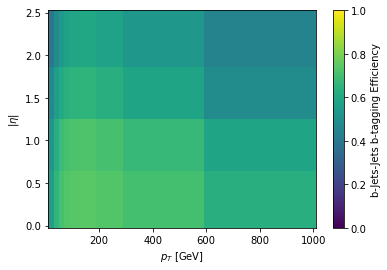

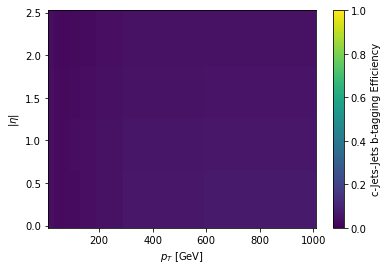

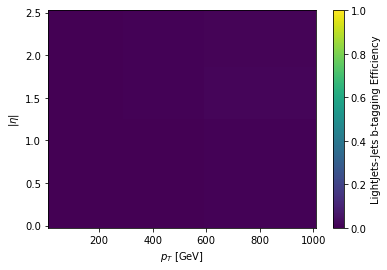

In [7]:
pts = np.linspace(20, 1000)
etas = np.linspace(0, 2.5)
pt, eta = np.meshgrid(pts, etas)

flavor_tags = {0: "LightJets", 4: "c-Jets", 5: "b-Jets"}
for i, flavor in enumerate([5, 4, 0]):
    fig, ax = plt.subplots()
    heatmap = ax.pcolormesh(pt, eta, efflookup(pt, eta, flavor), cmap='viridis', vmin=0, vmax=1)
    cbar = fig.colorbar(heatmap)
    ax.set_xlabel('$p_T$ [GeV]')
    ax.set_ylabel('$|\eta|$')
    cbar.set_label(f'{flavor_tags[flavor]}-Jets b-tagging Efficiency')

In [8]:
# Crear las carpetas si no existen
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Guardar el archivo
util.save(efflookup, output_file)

## Open coffea file

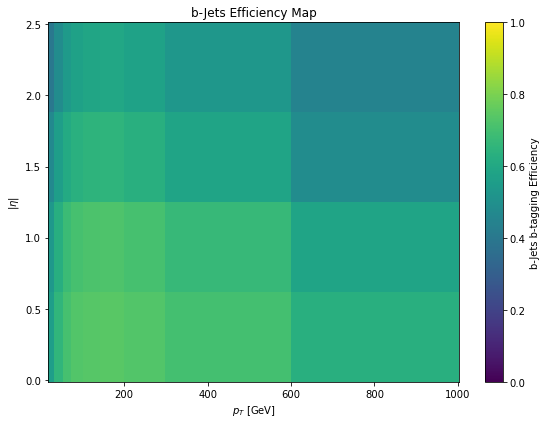

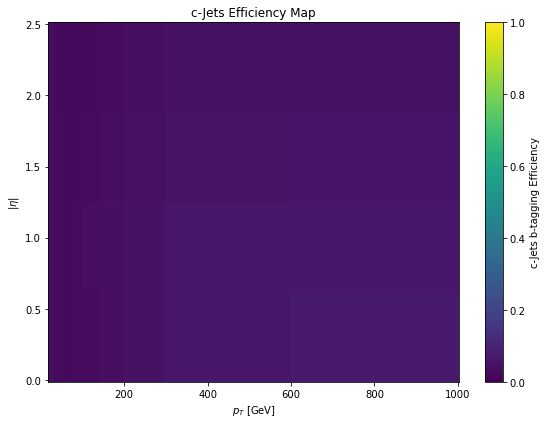

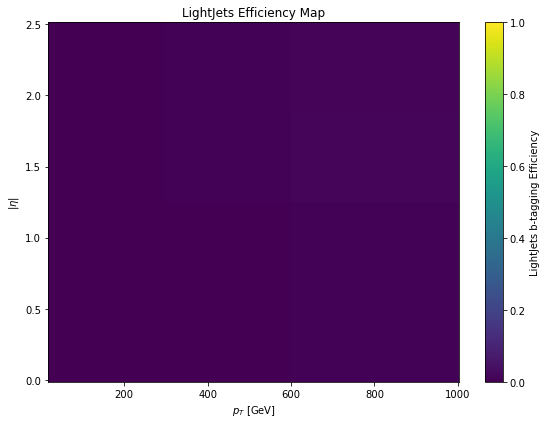

In [10]:
# Cargar el archivo
output_file = "btag_eff/btag_eff_deepJet_T_2018.coffea"
efflookup = util.load(output_file)

# Crear malla para graficar
pts = np.linspace(20, 1000, 200)
etas = np.linspace(0, 2.5, 100)
pt, eta = np.meshgrid(pts, etas)

# Diccionario de etiquetas por sabor
flavor_tags = {0: "LightJets", 4: "c-Jets", 5: "b-Jets"}

# Graficar para cada tipo de jet
for flavor in [5, 4, 0]:
    fig, ax = plt.subplots(figsize=(8, 6))
    eff_map = efflookup(pt, eta, np.full_like(pt, flavor))
    heatmap = ax.pcolormesh(pt, eta, eff_map, cmap='viridis', vmin=0, vmax=1)
    cbar = fig.colorbar(heatmap)
    ax.set_xlabel('$p_T$ [GeV]')
    ax.set_ylabel('$|\eta|$')
    cbar.set_label(f'{flavor_tags[flavor]} b-tagging Efficiency')
    plt.title(f'{flavor_tags[flavor]} Efficiency Map')
    plt.tight_layout()
    plt.show()